## Understanding Descriptive Statistics

Import the necessary libraries here:

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np

# Challenge 1
## Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [110]:
def rolling_dice(list):
    dice = [1, 2, 3, 4, 5, 6]
    x = random.choices(dice, k=10)
    return x

In [111]:
y = rolling_dice(dice)
y

[5, 3, 4, 4, 2, 5, 1, 6, 1, 1]

In [112]:
df = pd.DataFrame(np.array(y), columns = ['Rolling_Dice'])
df

,Rolling_Dice
0,5
1,3
2,4
3,4
4,2
5,5
6,1
7,6
8,1
9,1


## Plot the results sorted by value.

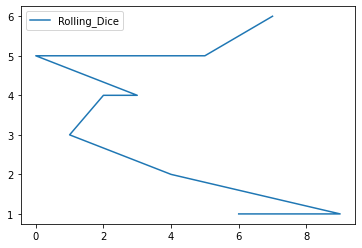

In [113]:
df.sort_values(by='Rolling_Dice', inplace= True)
df.plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

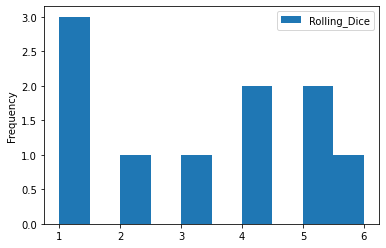

In [114]:
df.plot(kind='hist')

**Answer: The first graphic has the axis X as index and Y as number of the rolling dice.
And the second one has the axis X as number of the rolling dice and Y as frequency.
The second graphic is easier to read and understand.**

# Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

## Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [115]:
def mean(list):
    mean = sum(list)/len(list)
    return mean

mean(y)

3.2

## 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [116]:
frequency_distribution = df['Rolling_Dice'].value_counts()
total = 0
for i in list(frequency_distribution.index):
    total += frequency_distribution[i]*i

total/len(y)

3.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [117]:
def median(my_list):
    my_list = sorted(my_list)
    if len(my_list)%2 == 0:
        z = int((len(my_list)/2))
        return (my_list[z] + my_list[z-1])/2
    else:
        return my_list[int((len(my_list)/2))]
    return median

In [118]:
median(y)

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [119]:
def four_quartiles(my_list):
    med = median(my_list)
    my_list = sorted(my_list)
    mid = int(len(my_list)/2)
    if len(my_list)%2 == 0:
        q1 = median(my_list[:mid])
        q3 = median(my_list[mid:])
    else:
        q1 = median(my_list[:mid])
        q3 = median(my_list[mid+1:])
    return q1, med, q3

In [121]:
four_quartiles(y)

(1, 3.5, 5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [122]:
df = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/roll_the_dice_hundred.csv')
df.head(10)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


Text(0.5, 0, 'Rolling Dice')

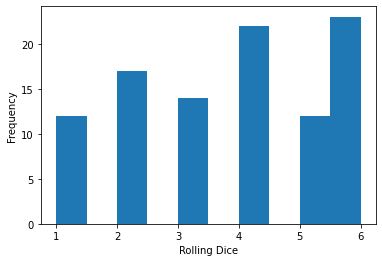

In [123]:
df['value'].plot(kind='hist')
plt.xlabel('Rolling Dice')

**Answer: The number that appeared more in the rolling dice is 6, in sequence the number 4, 2 and 3. The number 1 and 5 seem to have a similar frequency.**

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [124]:
mean(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [125]:
df['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

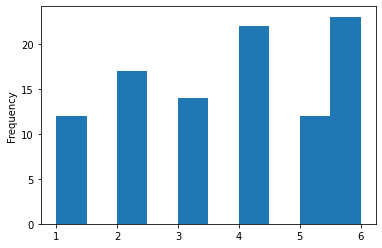

In [126]:
df['value'].plot(kind='hist')

3.74

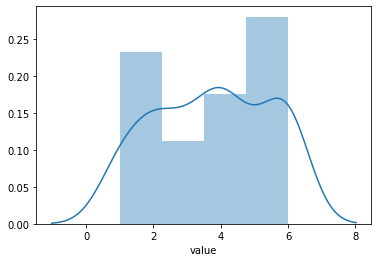

In [127]:
sns.distplot(df['value'])
df['value'].mean()

**Answer: The mean is almost in the middle of histogram.**

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [128]:
df = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/roll_the_dice_thousand.csv')
df.head(10)

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
5,5,5,2
6,6,6,6
7,7,7,5
8,8,8,6
9,9,9,6


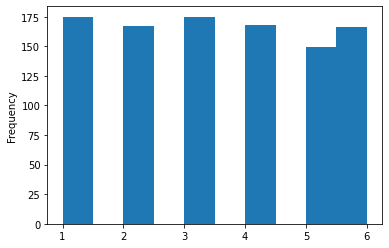

In [129]:
df['value'].plot(kind='hist')

**Answer: We can see that the difference between the distribution of values decreased.**

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [130]:
df = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/ages_population.csv')
df.head(10)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
5,27.0
6,39.0
7,12.0
8,42.0
9,33.0


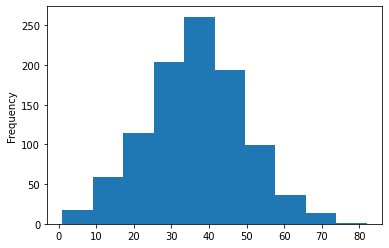

In [131]:
df['observation'].plot(kind='hist')

In [132]:
df.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [133]:
mean(df['observation'])

36.56

In [134]:
df.std(axis=0)

observation    12.8165
dtype: float64

**Answer: We can see that this histogram looks like a normal distribution, so the mean is almost in the middle of the graphic.**

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [135]:
df2 = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/ages_population2.csv')
df2.head(10)

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
5,29.0
6,28.0
7,30.0
8,24.0
9,26.0


In [136]:
df2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


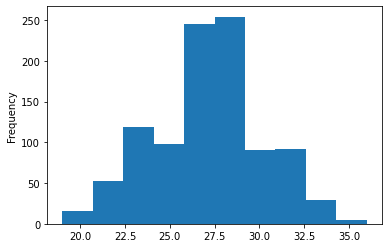

In [137]:
df2['observation'].plot(kind='hist')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

**Answer: First, this graph comprises a narrower age range, so the distance from these values is shorter. Also, this result is more concentrated in the middle.**  

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [138]:
mean(df2['observation'])

27.155

In [139]:
df2.std(axis=0)

observation    2.969814
dtype: float64

**Answer: As I answered before, we can see that the standard deviation is small, because the distance of the values is shorter and the values are more concentrated. And the mean is in the middle between the maximum and minimum values.**

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [140]:
df3 = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/ages_population3.csv')
df3.head(10)

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
5,52.0
6,37.0
7,69.0
8,36.0
9,30.0


In [141]:
df3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


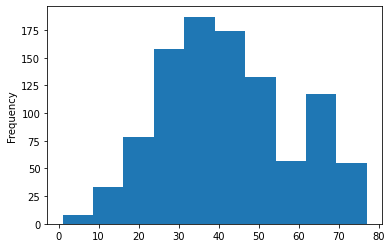

In [142]:
df3['observation'].plot(kind='hist')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [143]:
mean(df3['observation'])

41.989

In [144]:
df3.std(axis=0)

observation    16.144706
dtype: float64

**Answer: Here we have a more similar size than the histogram 1, looking at the age range. It has more distance from these values, so the standard deviation is bigger than the histogram 2. The mean is almost in the middle between the maximum and minimum values.**

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [145]:
four_quartiles(df3['observation'])


(30.0, 40.0, 53.0)

**Answer: The median and mean are very similar, but we can see that it has a little difference in relation the distance of median and Q1/Q3, the distance between median and Q3 is little bigger than median and Q1.**

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [146]:
df3.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

,observation
0.1,22.0
0.2,28.0
0.3,32.0
0.4,36.0
0.5,40.0
0.6,45.0
0.7,50.0
0.8,57.0
0.9,67.0
1.0,77.0


**Answer: We can see this difference that I commented before, that the values below 0.5 have a shorter distance than the values above it.**

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

Text(0.5, 0, 'Age Range')

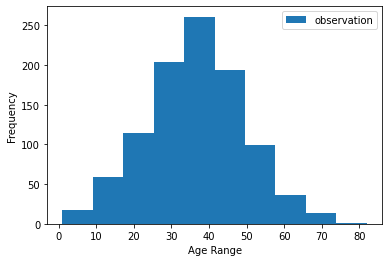

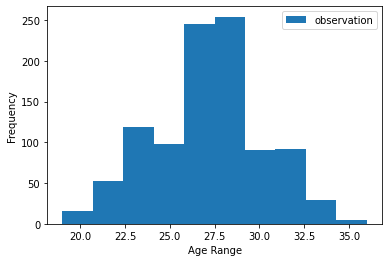

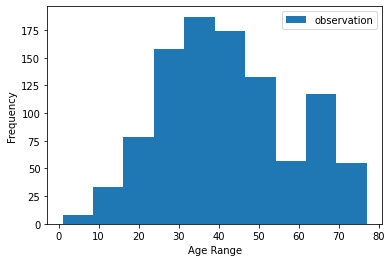

In [154]:
df = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/ages_population.csv')
df2 = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/ages_population2.csv')
df3 = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/ages_population3.csv')

df.plot(kind='hist')
plt.xlabel('Age Range')
df2.plot(kind='hist')
plt.xlabel('Age Range')
df3.plot(kind='hist')
plt.xlabel('Age Range')

**Answer: 
First, we can see that we have different ranges in these graphics, the graphic 2 has a narrower age range, if we compare to graphic 1 and 3. 
Also, the graphic 2 is more concentrated in the middle. Because of that, we can see that the neighbourhood 2 in Barcelona is concentrated in a group of young people, around 27 years old.
The neighbourhood 1 has a better distribution, as we can see a symmetrical graph. We can draw a line over age 37 (graphic peak), dividing the graph in two sides, and notice that the frequency of the values is decreasing for both sides, until we reach 1 year old (to the left) and 82 years old (to the right).
Finally, the neighbourhood 3 is more distributed than 2, with an age range between 1 and 77 years old. We can see that in the left side of the mean, the values are decreasing until reach the age 1. But the right side behaves a little differently, because inside the age range 60 and 70, the frequency increases again.**